In [1]:
%matplotlib inline

from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras import applications
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input

from scipy import ndimage
from matplotlib.pyplot import imshow
from PIL import Image
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
import numpy as np

In [2]:
model = VGG16(weights='imagenet', include_top=True)
model.summary()

553467904/553467096 [==============================] - 113s 0us/step

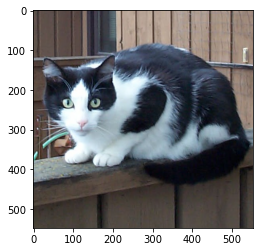

In [3]:
img = Image.open('../data/cat.jpg')
w, h = img.size
s = min(w, h)
y = (h - s) // 2
x = (w - s) // 2
img = img.crop((x, y, s, s))
imshow(np.asarray(img))

In [4]:
target_size = max(x for x in model.layers[0].input_shape if x)
img = img.resize((target_size, target_size), Image.ANTIALIAS)
imshow(np.asarray(img))

TypeError: an integer is required (got type tuple)

In [5]:
np_img = image.img_to_array(img)
img_batch = np.expand_dims(np_img, axis=0)
pre_processed = preprocess_input(img_batch)
pre_processed.shape

(1, 548, 554, 3)

In [6]:
features = model.predict(pre_processed)
features.shape

ValueError: in user code:

    /home/af/Dokumenter/Programs/miniconda3/envs/DeepLearningCookbook-py38/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1462 predict_function  *
        return step_function(self, iterator)
    /home/af/Dokumenter/Programs/miniconda3/envs/DeepLearningCookbook-py38/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/af/Dokumenter/Programs/miniconda3/envs/DeepLearningCookbook-py38/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/af/Dokumenter/Programs/miniconda3/envs/DeepLearningCookbook-py38/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/af/Dokumenter/Programs/miniconda3/envs/DeepLearningCookbook-py38/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/af/Dokumenter/Programs/miniconda3/envs/DeepLearningCookbook-py38/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1445 run_step  **
        outputs = model.predict_step(data)
    /home/af/Dokumenter/Programs/miniconda3/envs/DeepLearningCookbook-py38/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1418 predict_step
        return self(x, training=False)
    /home/af/Dokumenter/Programs/miniconda3/envs/DeepLearningCookbook-py38/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/af/Dokumenter/Programs/miniconda3/envs/DeepLearningCookbook-py38/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:385 call
        return self._run_internal_graph(
    /home/af/Dokumenter/Programs/miniconda3/envs/DeepLearningCookbook-py38/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /home/af/Dokumenter/Programs/miniconda3/envs/DeepLearningCookbook-py38/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /home/af/Dokumenter/Programs/miniconda3/envs/DeepLearningCookbook-py38/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer fc1 is incompatible with the layer: expected axis -1 of input shape to have value 25088 but received input with shape [None, 147968]


In [7]:
decode_predictions(features, top=5)

NameError: name 'features' is not defined